In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import networkx as nx

from utils.utils import *

import utils.dyngdim.dyngdim as dyngdim
from utils.dyngdim.plotting import compute_dim_max, plot_results

# Examples to check parameters

In [2]:
t_min = 0
t_max = 2
n_t = 50
n_workers = 25

times = np.logspace(t_min, t_max, n_t)

In [3]:
t_best = 1 + 1/0.3
idx_best = np.argmin(np.abs(times-t_best))
print(t_best, times[idx_best])

4.333333333333334 4.498432668969445


In [4]:
dict_control

{'name': 'control',
 'sessions': [1, 2],
 'parcs': array([ 100,  200,  500, 1000])}

######## control - ses 01 - parc 100 - total 29 - thr mask - subctx False ########
- Loading sub-040


/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:128: RuntimeWarning: Mean of empty slice
  local_dimensions.append(np.nanmean(relative_dimensions_reduced, axis=1))
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/plotting.py:273: RuntimeWarning: Mean of empty slice
  plt.plot(times, np.nanmean(local_dimensions, axis=1), 'o-', c='violet', zorder=-1)
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/plotting.py:287: RuntimeWarning: Mean of empty slice
  dim_avg = np.nanmean(local_dimensions, axis=1)
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/plotting.py:292: RuntimeWarning: Mean of empty slice
  plt.plot(times[imax], np.nanmean(local_dimensions, axis=1)[imax], 'o', c='red', label=r'D$_{max}$='+str(np.round(dim,2)))


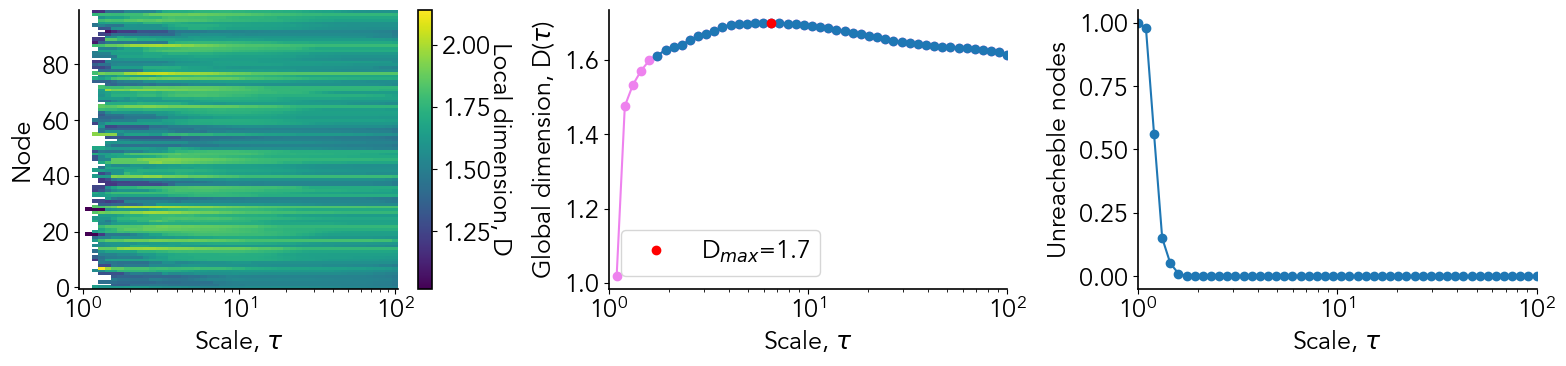

######## control - ses 01 - parc 200 - total 29 - thr mask - subctx False ########
- Loading sub-040


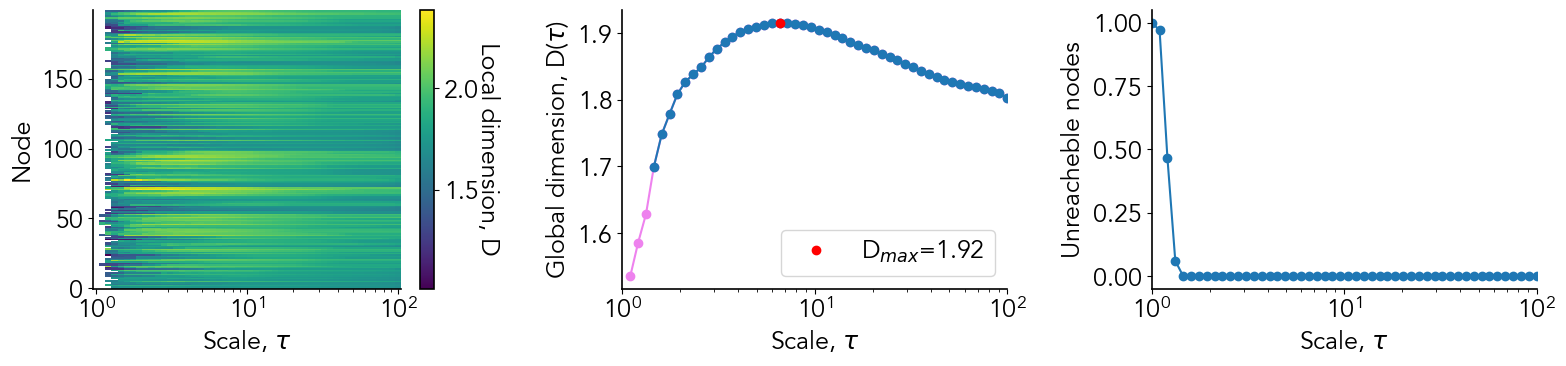

######## control - ses 01 - parc 500 - total 29 - thr mask - subctx False ########
- Loading sub-040


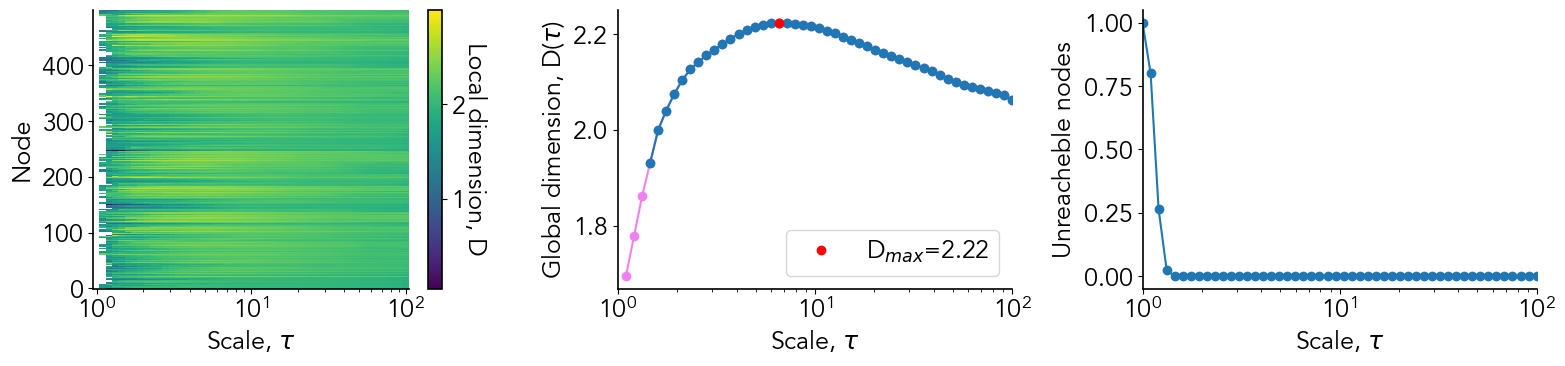

In [5]:
for parc in dict_control['parcs'][:-1]:
    ses = 1
    
    data = data_loader(which='control', ses=ses, parc=parc, include_subctx=False, thr='mask')

    mat = data.load_matrix(0)
    
    mat /= mat.max()
    local_dimensions = dyngdim.run_local_dimension(nx.from_numpy_array(mat), times, n_workers=n_workers, use_spectral_gap=False)
    
    dim, dim_all = plot_results(times, local_dimensions, mat)

In [6]:
tt = np.array( [1.77, 1.99, 2.31, 2.57] )

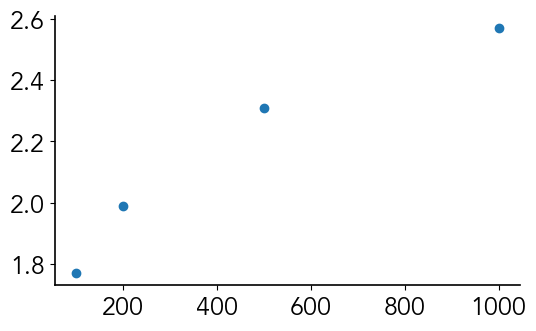

In [7]:
plt.plot(parcellations, tt, 'o')
plt.show()

# Run all dataset

In [8]:
#folder = 'results/dimensionality/'
folder = 'results/dimensionality_local_thr/'
tmp_dicts = [dict_control, dict_stroke]

for tmp_dict in tmp_dicts:
    which = tmp_dict['name']
    
    for parc in tmp_dict['parcs'][:-1]:
        for ses in tmp_dict['sessions'][:-1]:
            # Load dataset
            data = data_loader(which=which, ses=ses, parc=parc, thr='mask', include_subctx=False)
            
            for idx, mat in enumerate(data):
                # Check if connected - otherwise it has returned None
                if mat is None:
                    continue
                    
                # Compute dimension
                mat /= mat.max()
                local_dimensions = dyngdim.run_local_dimension(nx.from_numpy_array(mat), times, n_workers=n_workers, use_spectral_gap=False)
                dim, dim_all = compute_dim_max(local_dimensions)
        
                # Store dimension
                #np.savetxt(folder+data.full_names[idx], dim_all)
                np.savetxt(folder+data.full_names[idx], local_dimensions[idx_best])

######## control - ses 01 - parc 100 - total 29 - thr mask - subctx False ########
- Loading sub-040
- Loading sub-041


/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/plotting.py:240: RuntimeWarning: Mean of empty slice
  dim_avg = np.nanmean(local_dimensions, axis=1)


- Loading sub-042
- Loading sub-043
- Loading sub-044
- Loading sub-045
- Loading sub-046
- Loading sub-047
- Loading sub-048
- Loading sub-049
- Loading sub-050
- Loading sub-051
- Loading sub-052
- Loading sub-055
- Loading sub-057
- Loading sub-059
- Loading sub-060
- Loading sub-061
- Loading sub-062
- Loading sub-063
- Loading sub-064
- Loading sub-065
- Loading sub-066
- Loading sub-067
- Loading sub-068
- Loading sub-069
- Loading sub-070
- Loading sub-071
- Loading sub-072
######## control - ses 01 - parc 200 - total 29 - thr mask - subctx False ########
- Loading sub-040
- Loading sub-041
- Loading sub-042
- Loading sub-043
- Loading sub-044
- Loading sub-045
- Loading sub-046
- Loading sub-047
- Loading sub-048
- Loading sub-049
- Loading sub-050
- Loading sub-051
- Loading sub-052
- Loading sub-055
- Loading sub-057
- Loading sub-059
- Loading sub-060
- Loading sub-061
- Loading sub-062
- Loading sub-063
- Loading sub-064
- Loading sub-065
- Loading sub-066
- Loading sub-067

/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(


- Loading sub-045
- Loading sub-046
- Loading sub-047
- Loading sub-048
- Loading sub-049
- Loading sub-050
- Loading sub-051
- Loading sub-052
- Loading sub-055


/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(


- Loading sub-057


/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(


- Loading sub-059
- Loading sub-060
- Loading sub-061
- Loading sub-062


/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(


- Loading sub-063
- Loading sub-064


/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(


- Loading sub-065
- Loading sub-066
- Loading sub-067
- Loading sub-068
- Loading sub-069
- Loading sub-070
- Loading sub-071
- Loading sub-072


/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(


######## stroke - ses 01 - parc 100 - total 51 - thr mask - subctx False ########
- Loading sub-200
- Loading sub-201
- Loading sub-202
- Loading sub-203
- Loading sub-204
- Loading sub-205
- Loading sub-206
- Loading sub-208
- Loading sub-209
- Loading sub-210
- Loading sub-213
- Loading sub-216
- Loading sub-219
- Loading sub-222
- Loading sub-224
- Loading sub-226
- Loading sub-227
- Loading sub-232
- Loading sub-233
- Loading sub-234
- Loading sub-235
- Loading sub-238
- Loading sub-239
- Loading sub-240
- Loading sub-243
- Loading sub-245
- Loading sub-246
- Loading sub-247
- Loading sub-249
- Loading sub-250
- Loading sub-251
- Loading sub-252
- Loading sub-253
- Loading sub-256
- Loading sub-260
- Loading sub-261
- Loading sub-262
- Loading sub-263
- Loading sub-264
- Loading sub-265
- Loading sub-266
- Loading sub-267
- Loading sub-268
- Loading sub-269
- Loading sub-272
- Loading sub-273
- Loading sub-274
- Loading sub-275
- Loading sub-277
- Loading sub-279
- Loading sub-280


/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(


- Loading sub-247
- Loading sub-249
- Loading sub-250
- Loading sub-252
- Loading sub-259
- Loading sub-260
- Loading sub-261
- Loading sub-262
- Loading sub-263
- Loading sub-264
- Loading sub-266
- Loading sub-267
- Loading sub-268
- Loading sub-272
- Loading sub-273
- Loading sub-277


/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(


- Loading sub-279
######## stroke - ses 01 - parc 200 - total 51 - thr mask - subctx False ########
- Loading sub-200
- Loading sub-201
- Loading sub-202
- Loading sub-203
- Loading sub-204
- Loading sub-205
- Loading sub-206
- Loading sub-208


/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(


- Loading sub-209
- Loading sub-210
- Loading sub-213
- Loading sub-216
- Loading sub-219
- Loading sub-222
- Loading sub-224
- Loading sub-226
- Loading sub-227
- Loading sub-232
- Loading sub-233
- Loading sub-234
- Loading sub-235
- Loading sub-238
- Loading sub-239
- Loading sub-240
- Loading sub-243
- Loading sub-245
- Loading sub-246
- Loading sub-247
- Loading sub-249
- Loading sub-250
- Loading sub-251
- Loading sub-252
- Loading sub-253
- Loading sub-256
- Loading sub-260
- Loading sub-261
- Loading sub-262
- Loading sub-263
- Loading sub-264
- Loading sub-265
- Loading sub-266
- Loading sub-267
- Loading sub-268
- Loading sub-269
- Loading sub-272
- Loading sub-273
- Loading sub-274
- Loading sub-275
- Loading sub-277
- Loading sub-279
- Loading sub-280
######## stroke - ses 02 - parc 200 - total 32 - thr mask - subctx False ########
- Loading sub-200
- Loading sub-201
- Loading sub-202
- Loading sub-203
- Loading sub-206
- Loading sub-209
- Loading sub-213
- Loading sub-219


/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(


- Loading sub-232
- Loading sub-239
- Loading sub-247
- Loading sub-249
- Loading sub-250
- Loading sub-252
- Loading sub-259
- Loading sub-260
- Loading sub-261
- Loading sub-262
- Loading sub-263
- Loading sub-264
- Loading sub-266
- Loading sub-267
- Loading sub-268
- Loading sub-272
- Loading sub-273
- Loading sub-277


/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(


- Loading sub-279
######## stroke - ses 01 - parc 500 - total 51 - thr mask - subctx False ########
- Loading sub-200
- Loading sub-201
- Loading sub-202
- Loading sub-203
- Loading sub-204
- Loading sub-205
- Loading sub-206
- Loading sub-208
- Loading sub-209
- Loading sub-210
- Loading sub-213
- Loading sub-216
- Loading sub-219
- Loading sub-222
- Loading sub-224
- Loading sub-226
- Loading sub-227
- Loading sub-232
- Loading sub-233
- Loading sub-234
- Loading sub-235
- Loading sub-238
- Loading sub-239
- Loading sub-240
- Loading sub-243
- Loading sub-245
- Loading sub-246


/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(


- Loading sub-247
- Loading sub-249
- Loading sub-250
- Loading sub-251
- Loading sub-252


/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(


- Loading sub-253
- Loading sub-256
- Loading sub-260
- Loading sub-261
- Loading sub-262
- Loading sub-263
- Loading sub-264


/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(


- Loading sub-265
- Loading sub-266
- Loading sub-267
- Loading sub-268
- Loading sub-269


/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Plea

- Loading sub-272


/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(


- Loading sub-273
- Loading sub-274


/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(


- Loading sub-275


/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(


- Loading sub-277
- Loading sub-279
- Loading sub-280
######## stroke - ses 02 - parc 500 - total 32 - thr mask - subctx False ########
- Loading sub-200
- Loading sub-201
- Loading sub-202
- Loading sub-203
- Loading sub-206
- Loading sub-209
- Loading sub-213
- Loading sub-219


/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(


- Loading sub-220
- Loading sub-223


/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(


- Loading sub-224
- Loading sub-228


/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(


- Loading sub-229
- Loading sub-232
- Loading sub-239
- Loading sub-247
- Loading sub-249
- Loading sub-250


/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(


- Loading sub-252


/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(


- Loading sub-259


/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(


- Loading sub-260
- Loading sub-261
- Loading sub-262
- Loading sub-263
- Loading sub-264


/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(


- Loading sub-266
- Loading sub-267
- Loading sub-268
- Loading sub-272
- Loading sub-273
- Loading sub-277
- Loading sub-279
